## FETCHING DATA

In [464]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_option_data=pd.read_csv('/content/hal_ki_chain.csv')

In [465]:

df_option_data.head()
requirred_data=df_option_data.iloc[:,[4,10]]
requirred_data



,LTP,STRIKE
0,740,4000.0
1,-,4100.0
2,553.9,4200.0
3,519.35,4300.0
4,412,4400.0
5,314,4500.0
6,254.35,4600.0
7,200.65,4700.0
8,155.7,4800.0
9,120.8,4900.0


In [466]:
new_data_frame=requirred_data.drop(index=[1]).reset_index(drop=True)
new_data_frame['LTP']=new_data_frame['LTP'].astype(float)
new_data_frame['STRIKE']=new_data_frame['STRIKE'].astype(str).str.replace(',','').astype(float)

new_data_frame
my_strike_list=new_data_frame.iloc[:,1]
my_strike_list

,STRIKE
0,4000.0
1,4200.0
2,4300.0
3,4400.0
4,4500.0
5,4600.0
6,4700.0
7,4800.0
8,4900.0
9,5000.0


## CALCULATING ALL POSSIBLE SPREAD AND MAX_LOSS

In [467]:


my_outer_list=[]
for i in range(len(new_data_frame)):
  my_list=[]
  for j in range(len(new_data_frame)):
    my_list.append(new_data_frame.iloc[i,0]-new_data_frame.iloc[j,0])

  my_outer_list.append(my_list)

df_max_loss=pd.DataFrame(my_outer_list)

my_outer_list_spread=[]
for i in range(len(new_data_frame)):
  my_list=[]
  for j in range(len(new_data_frame)):
    my_list.append(new_data_frame.iloc[i,1]-new_data_frame.iloc[j,1])

  my_outer_list_spread.append(my_list)

df_spread=pd.DataFrame(my_outer_list_spread)

print(df_spread,df_max_loss)

        0       1       2       3       4       5       6       7       8   \
0      0.0  -200.0  -300.0  -400.0  -500.0  -600.0  -700.0  -800.0  -900.0   
1    200.0     0.0  -100.0  -200.0  -300.0  -400.0  -500.0  -600.0  -700.0   
2    300.0   100.0     0.0  -100.0  -200.0  -300.0  -400.0  -500.0  -600.0   
3    400.0   200.0   100.0     0.0  -100.0  -200.0  -300.0  -400.0  -500.0   
4    500.0   300.0   200.0   100.0     0.0  -100.0  -200.0  -300.0  -400.0   
5    600.0   400.0   300.0   200.0   100.0     0.0  -100.0  -200.0  -300.0   
6    700.0   500.0   400.0   300.0   200.0   100.0     0.0  -100.0  -200.0   
7    800.0   600.0   500.0   400.0   300.0   200.0   100.0     0.0  -100.0   
8    900.0   700.0   600.0   500.0   400.0   300.0   200.0   100.0     0.0   
9   1000.0   800.0   700.0   600.0   500.0   400.0   300.0   200.0   100.0   
10  1100.0   900.0   800.0   700.0   600.0   500.0   400.0   300.0   200.0   
11  1200.0  1000.0   900.0   800.0   700.0   600.0   500.0   400

## CALCULATING REAWRD TO RISK

In [468]:

df_risk_reward=(-df_spread-df_max_loss)/df_max_loss
# print(df_risk_reward)
df_risk_reward=df_risk_reward.unstack().sort_values(ascending=False).dropna().drop_duplicates()
my_loss_listt=[]
my_max_profit_list=[]
for i in range(len(df_risk_reward)):
  my_loss_listt.append(df_max_loss.iloc[df_risk_reward.index[i][1],df_risk_reward.index[i][0]])
  my_max_profit_list.append(-df_spread.iloc[df_risk_reward.index[i][1],df_risk_reward.index[i][0]]-df_max_loss.iloc[df_risk_reward.index[i][1],df_risk_reward.index[i][0]])

df_risk_reward=pd.DataFrame(df_risk_reward)
df_risk_reward['loss']=my_loss_listt
df_risk_reward['profit']=my_max_profit_list

df_risk_reward=df_risk_reward[df_risk_reward['loss']>0 ]
df_risk_reward=df_risk_reward[df_risk_reward[0]>0 ]

In [469]:
strike_1=[]
strike_2=[]
for i in range(len(df_risk_reward)):
  strike_1.append(my_strike_list[df_risk_reward.index[i][0]])
  strike_2.append(my_strike_list[df_risk_reward.index[i][1]])
df_risk_reward['strike_1']=strike_1
df_risk_reward['strike_2']=strike_2
df_risk_reward.columns=['reward','loss','profit','strike_1','strike_2']
df_risk_reward.reset_index(drop=True)
df_risk_reward.index
my_strike_list

,STRIKE
0,4000.0
1,4200.0
2,4300.0
3,4400.0
4,4500.0
5,4600.0
6,4700.0
7,4800.0
8,4900.0
9,5000.0


In [470]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df_risk_reward)

https://docs.google.com/spreadsheets/d/17-_77uD0giPbqZkn32zfjfLfZHu0MPS1S-443LXbIok#gid=0


## CALCULATING VOLATILTY AND PREDICTING PRICE RANGE OVER A TIME PERIOD

In [471]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=yf.download(tickers='HAL.NS',period='max',interval='1d')
req_data=data['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [472]:
req_data

,Adj Close
Date,
2018-04-02,480.766541
2018-04-03,472.128021
2018-04-04,466.815247
2018-04-05,465.999512
2018-04-06,461.356079
2018-04-09,462.025330
2018-04-10,461.125916
2018-04-11,459.034241
2018-04-12,454.369934


In [473]:
req_data=pd.DataFrame(req_data)
req_data.reset_index(inplace=True)


per_change=[None]


for i in range(1,len(req_data)):
  change=((req_data.iloc[i,1]-req_data.iloc[i-1,1])/req_data.iloc[i-1,1])*100
  per_change.append(change)


req_data['%change']=per_change

req_data=req_data.drop(index=0)





In [474]:
req_data
mean=req_data['%change'].mean()
std=req_data['%change'].std()
print(mean,std)

0.1728918776821922 2.34078720159567


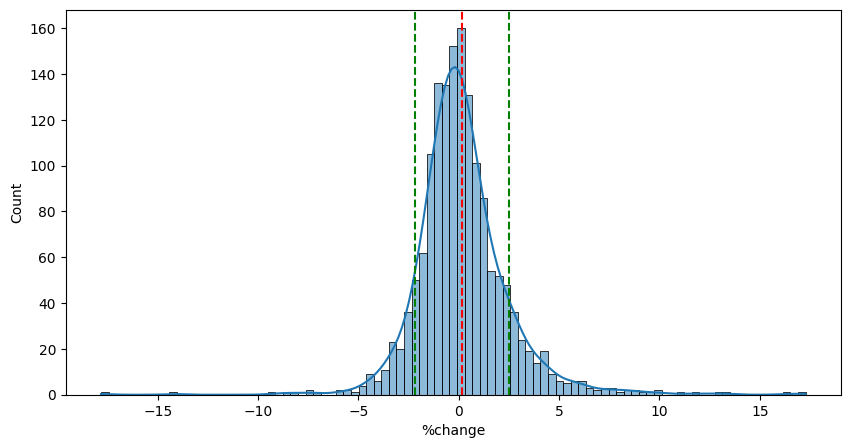

In [475]:
import math
plt.figure(figsize=(10,5))
sns.histplot(req_data['%change'],kde=True)
plt.axvline(mean,color='r',linestyle='--')
plt.axvline(mean+std,color='g',linestyle='--')
plt.axvline(mean-std,color='g',linestyle='--')
plt.show()



In [476]:
pos_change_in_next_ndays=mean+std*math.sqrt(20)
neg_change_in_next_ndays=mean-std*math.sqrt(20)
print(pos_change_in_next_ndays,neg_change_in_next_ndays)
print('\n')
current_price=4700
print(current_price*(1+pos_change_in_next_ndays/100))
print(current_price*(1+neg_change_in_next_ndays/100))



10.641210484941038 -10.295426729576654


5200.136892792229
4216.1149437098975


In [477]:
#range expected after results
estimated_current_price_at_result_date=4500
pos_change_in_next_ndays=mean+std*math.sqrt(14)
neg_change_in_next_ndays=mean-std*math.sqrt(14)

upper_target=estimated_current_price_at_result_date*(1+pos_change_in_next_ndays/100)
lower_target=estimated_current_price_at_result_date*(1+neg_change_in_next_ndays/100)
print(upper_target,lower_target)

4901.909202062934 4113.6510669284635


## FUNDAMENTAL_ANALYSIS

In [478]:
df_quat_combined=pd.read_excel('/content/COMBINED.xlsx')
df_quat_combined
df_quat_combined=df_quat_combined.iloc[[0,3,7,17,18,19,23,25]].reset_index(drop=True)

df_quat_combined.columns=df_quat_combined.iloc[0]
df_quat_combined=df_quat_combined.drop(index=0)
# display an interactive google sheet

df_quat_combined


,NaN,Mar '24,Dec '23,Sep '23,Jun '23,Mar '23,Dec '22,Sep '22,Jun '22,Mar '22,...,Sep '20,Jun '20,Mar '20,Dec '19,Sep '19,Jun '19,Mar '19,Dec '18,Sep '18,Jun '18
1,Total Income From Operations,"14,768.75","6,061.28","5,635.70","3,915.35","12,494.67","5,665.54","5,144.79","3,622.46","11,561.13",...,"4,853.60","1,736.74","10,323.00","4,456.35","3,451.07","3,291.44","10,044.44","4,425.29","2,610.33","2,813.82"
2,Increase/Decrease in Stocks,"-1,927.33",-110.86,227.68,-148.13,-674.09,255.15,25.95,-297.73,776.15,...,304.86,"-1,327.55","2,410.51","-1,012.55",-328.13,-358.41,"2,445.44",118.38,"-1,273.74",-122.54
3,"P/L Before Other Inc., Int., Excpt. Items &\nTax","5,257.29","1,223.16","1,177.99",675.45,"2,190.18",716.56,"1,369.66",618.08,"2,117.33",...,809.78,273.09,"1,992.23",670.87,535.32,731.41,"1,984.11",651.79,380.24,386.57
4,Other Income,557.31,459.98,469.37,409.94,722.23,497.18,259.07,191.64,500.66,...,87.97,47.25,159.96,33.18,41.03,59.73,119.40,57.39,70.03,129.29
5,"P/L Before Int., Excpt. Items & Tax","5,814.60","1,683.14","1,647.36","1,085.39","2,912.41","1,213.74","1,628.73",809.72,"2,617.99",...,897.75,320.34,"2,152.19",704.05,576.35,791.14,"2,103.51",709.18,450.27,515.86
6,P/L Before Tax,"5,783.19","1,682.78","1,647.04","1,085.37","2,857.11","1,211.67","1,628.36",809.49,"2,575.88",...,826.29,215.70,"2,051.20",646.00,480.93,816.06,"1,969.83",680.89,448.88,509.62
7,P/L After Tax from Ordinary Activities,"4,296.87","1,254.86","1,232.29",810.43,"2,844.64","1,153.92","1,218.94",607.36,"3,103.99",...,615.05,149.54,"1,249.63",457.32,621.30,562.39,"1,172.94",452.58,285.75,352.75


<ipython-input-479-fff66153d68f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_only_june_data.iloc[:,1:]=df_only_june_data.iloc[:,1:].apply(lambda x: x.str.replace(',','').astype(float))


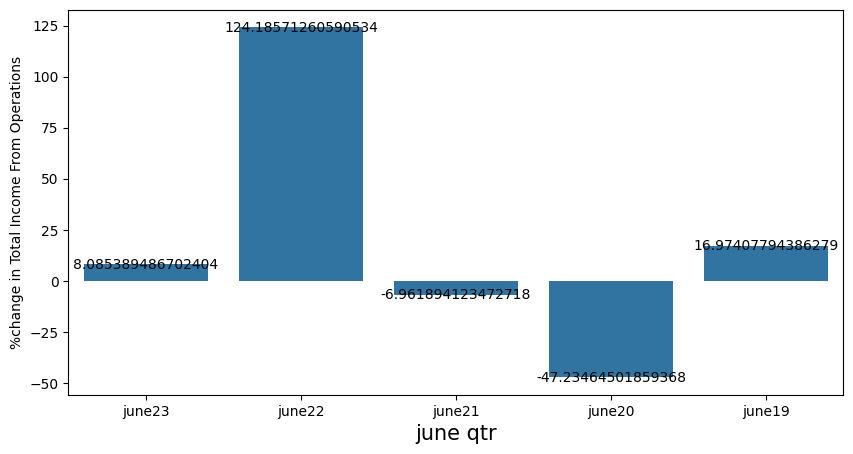

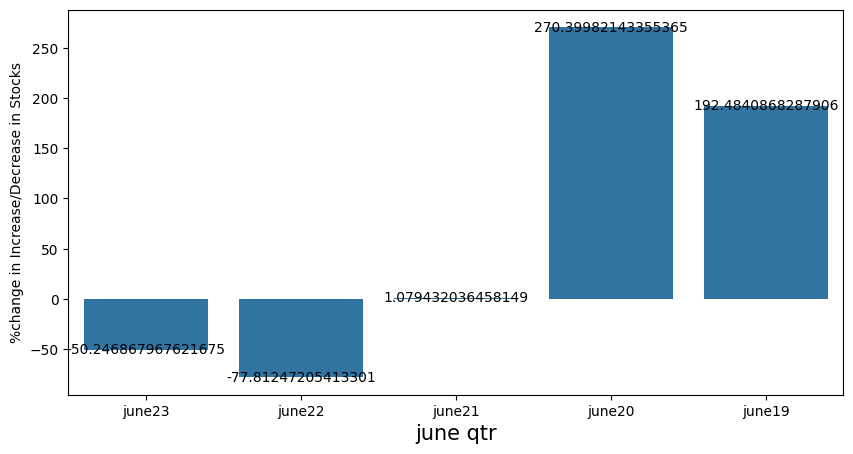

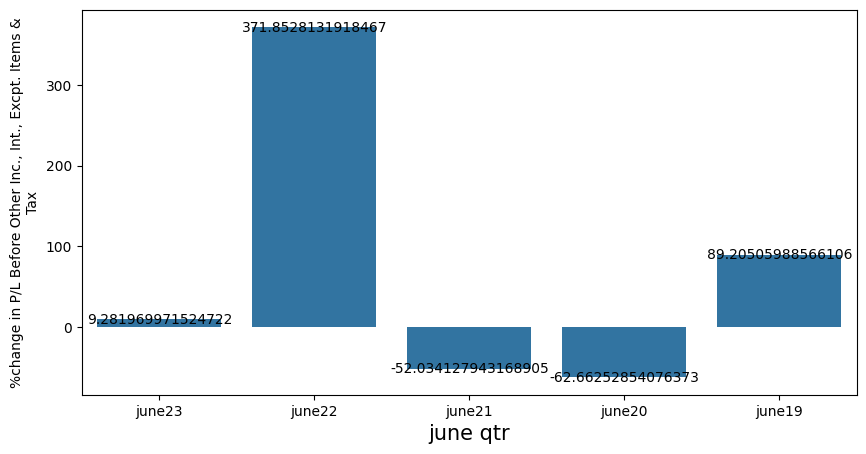

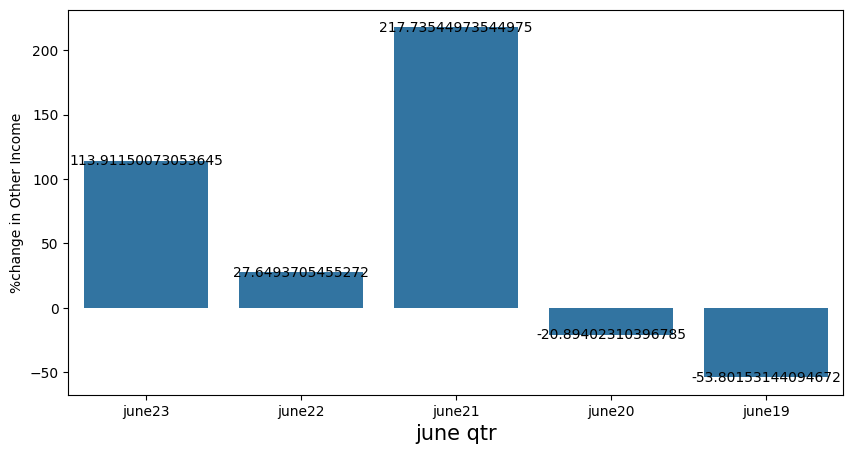

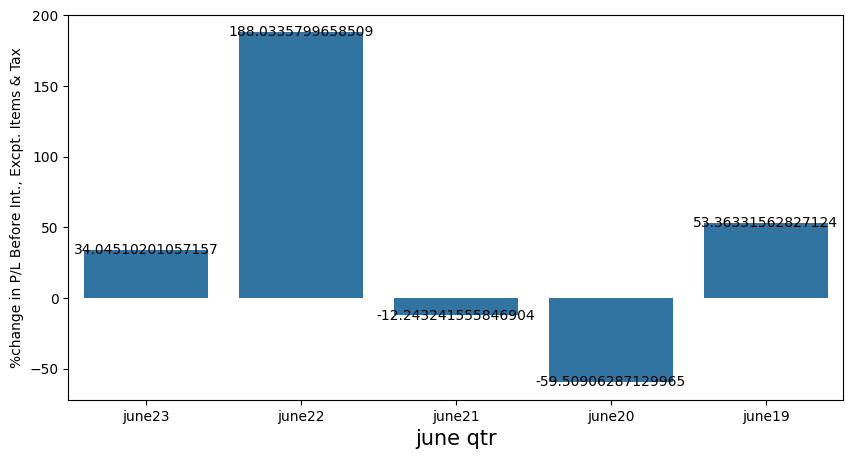

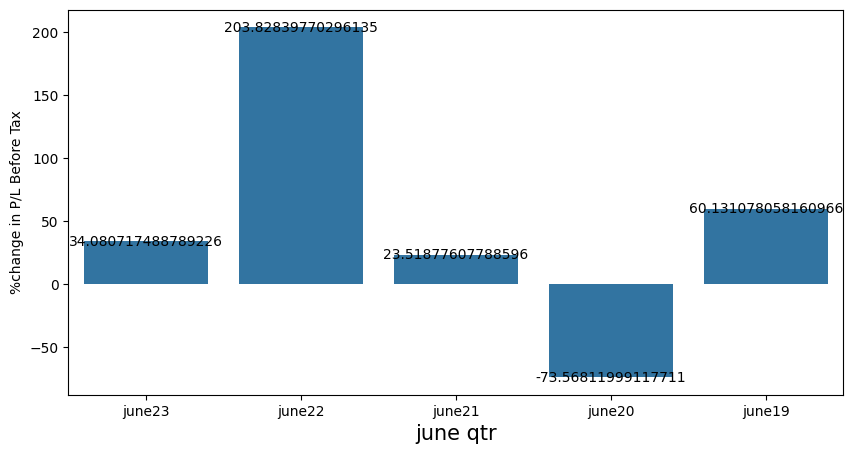

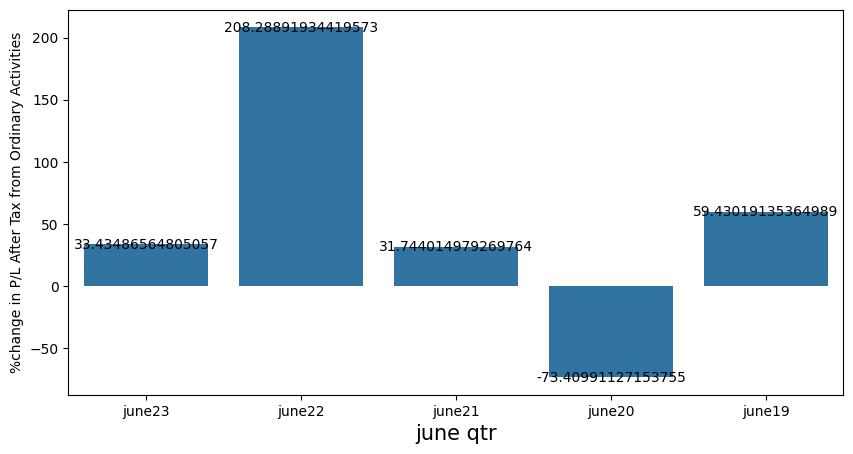

In [479]:
df_only_june_data=df_quat_combined.iloc[:,[0,4,8,12,16,20,24]]
df_only_june_data.iloc[:,1:]=df_only_june_data.iloc[:,1:].apply(lambda x: x.str.replace(',','').astype(float))
df_only_june_data

df_only_june_data_perc_increase_outer=[]

for i in range(len(df_only_june_data)):
  df_only_june_data_perc_increase=[]
  for  j in range(1,len(df_only_june_data.columns)-1):
    df_only_june_data_perc_increase.append(((df_only_june_data.iloc[i,j]-df_only_june_data.iloc[i,j+1])/df_only_june_data.iloc[i,j+1]))
  df_only_june_data_perc_increase_outer.append(df_only_june_data_perc_increase)


for i  in range(len(df_only_june_data_perc_increase_outer)):
  df_only_june_data_per_change_df=pd.DataFrame(df_only_june_data_perc_increase_outer)
  x_data=['june23','june22','june21','june20','june19']
  plt.figure(figsize=(10,5))
  ax=sns.barplot(x=x_data,y=df_only_june_data_per_change_df.iloc[i]*100)
  plt.ylabel(f'%change in {df_only_june_data.iloc[i,0]}',size=10)
  plt.xlabel('june qtr',size=15)
  for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height}', ha='center', va='center')


plt.show()

## QTR WISE SHARE IN REVENUE AND PROFIT

In [480]:


my_dict={}
for i,year in enumerate(range(24,18,-1)):
  start_col=1+i*4
  end_col=start_col+4
  my_dict[f'fy_{year}']=df_quat_combined.iloc[:,start_col:end_col]

for i in my_dict:
  my_dict[i]=my_dict[i].apply(lambda x: x.str.replace(',','').astype(float))
  my_dict[i]['total']=my_dict[i].sum(axis=1)
  for j in range(5):
    my_dict[i].iloc[:,j]=my_dict[i].iloc[:,j]/my_dict[i].iloc[:,4]


fy_24, fy_23, fy_22, fy_21, fy_20, fy_19 = [my_dict[f'fy_{year}'] for year in range(24, 18, -1)]



print(fy_24)
print(fy_23)
print(fy_22)
print(fy_21)
print(fy_20)
print(fy_19)




0   Mar '24   Dec '23   Sep '23   Jun '23  total
1  0.486117  0.199508  0.185500  0.128875    1.0
2  0.984014  0.056600 -0.116244  0.075629    1.0
3  0.630833  0.146769  0.141349  0.081049    1.0
4  0.293847  0.242529  0.247480  0.216145    1.0
5  0.568360  0.164522  0.161025  0.106094    1.0
6  0.567069  0.165005  0.161500  0.106426    1.0
7  0.565791  0.165234  0.162262  0.106713    1.0
0   Mar '23   Dec '22   Sep '22   Jun '22  total
1  0.464012  0.210400  0.191061  0.134527    1.0
2  0.975924 -0.369397 -0.037569  0.431043    1.0
3  0.447480  0.146402  0.279838  0.126281    1.0
4  0.432442  0.297691  0.155121  0.114746    1.0
5  0.443654  0.184892  0.248108  0.123346    1.0
6  0.439107  0.186221  0.250262  0.124410    1.0
7  0.488362  0.198103  0.209265  0.104270    1.0
0   Mar '22   Dec '21   Sep '21   Jun '21  total
1  0.469582  0.239313  0.225473  0.065631    1.0
2  1.310400  1.503799  0.451342 -2.265541    1.0
3  0.492628  0.245017  0.231878  0.030477    1.0
4  0.508320  0.19977

BASED ON PREV QTR QTR ON QTR

OF REVENUE=8.08%

OF EARNINGS=34.6%

BASED ON TRADING VIEW

REVENUE=15.2%

EARNINGS=7.6%



## HOW CORRECTLY MARKET PREDICTED MARKET

In [481]:
revenue_in_year_=df_quat_combined.iloc[0,:]

revenue_in_year_.iloc[1:]=revenue_in_year_.iloc[1:].str.replace( ',','').astype(float)
revenue_in_year_

# revenue_in_year_['increase_inrev_froom_past_qtr']=[revenue_in_year_[0]]


,1
0,
NaN,Total Income From Operations
Mar '24,14768.75
Dec '23,6061.28
Sep '23,5635.7
Jun '23,3915.35
Mar '23,12494.67
Dec '22,5665.54
Sep '22,5144.79
Jun '22,3622.46


In [507]:
revenue_df=pd.DataFrame(revenue_in_year_.reset_index())
revenue_df=revenue_df.drop(index=0)
revenue_df.columns=['qtr','revenue']


revenue_delta=[revenue_df['revenue'][i]-revenue_df['revenue'][i+1] for i in range(1,len(revenue_df))]
revenue_df.drop(index=len(revenue_df)-1,inplace=True)
revenue_df['revenue_delta']=revenue_delta
revenue_df



,qtr,revenue,revenue_delta
1,Mar '24,14768.75,8707.47
2,Dec '23,6061.28,425.58
3,Sep '23,5635.7,1720.35
4,Jun '23,3915.35,-8579.32
5,Mar '23,12494.67,6829.13
6,Dec '22,5665.54,520.75
7,Sep '22,5144.79,1522.33
8,Jun '22,3622.46,-7938.67
9,Mar '22,11561.13,5669.23
10,Dec '21,5891.9,340.74
